Range 0 <= width < 10: 34706
Range 10 <= width < 20: 57250
Range 20 <= width < 30: 24885
Range 30 <= width < 40: 13338
Range 40 <= width < 50: 8011
Range 50 <= width < inf: 20699

Range 0 <= width/height < 0.6: 7720
Range 0.6 <= width/height < 0.7: 22966
Range 0.7 <= width/height < 0.8: 46997
Range 0.8 <= width/height < 0.9: 45458
Range 0.9 <= width/height < 1.0: 16786
Range 1.0 <= width/height < inf: 18962



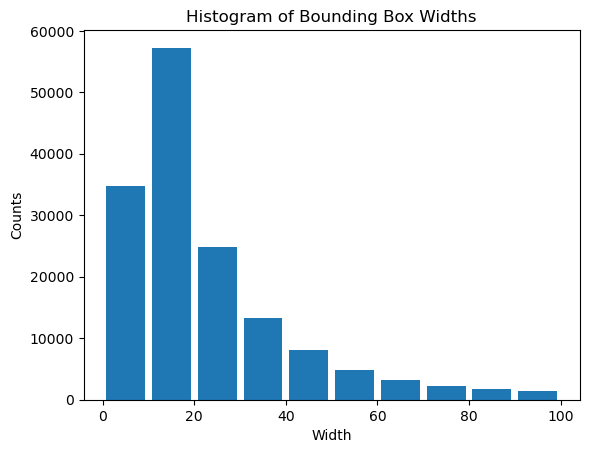

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if __name__ == '__main__':
    anno_file = 'annotation.txt'
    with open(anno_file, 'r') as fp:
        lines = fp.readlines()
    # Enter your code here (25%)
    # You might use the following to access each line
    # for line in lines:
    #2b.1
    valid_bboxes = []
    invalid_count = 0
    for line in lines:
        annotation = line.strip().split(' ')
        bboxes = np.array(annotation[1:], dtype=int).reshape(-1, 4)
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            if x1 >= 0 and y1 >= 0 and x2 > x1 and y2 > y1:
                valid_bboxes.append([x1, y1, x2, y2])
            else:
                invalid_count += 1
    #2b.2
    widths = [bbox[2] - bbox[0] + 1 for bbox in valid_bboxes]
    ranges = [0, 10, 20, 30, 40, 50, float('inf')]
    counts = [0] * (len(ranges) - 1)
    for width in widths:
        for i in range(len(ranges) - 1):
            if ranges[i] <= width < ranges[i + 1]:
                counts[i] += 1
                break
    for i, count in enumerate(counts):
        print(f'Range {ranges[i]} <= width < {ranges[i + 1]}: {count}')
    print()
    #2b.3
    ratios = [(bbox[2] - bbox[0] + 1) / (bbox[3] - bbox[1] + 1) for bbox in valid_bboxes]
    ratio_ranges = [0, 0.6, 0.7, 0.8, 0.9, 1.0, float('inf')]
    ratio_counts = [0] * (len(ratio_ranges) - 1)
    for ratio in ratios:
        for i in range(len(ratio_ranges) - 1):
            if ratio_ranges[i] <= ratio < ratio_ranges[i + 1]:
                ratio_counts[i] += 1
                break
    for i, count in enumerate(ratio_counts):
        print(f'Range {ratio_ranges[i]} <= width/height < {ratio_ranges[i + 1]}: {count}')
    print()
    #2b.4
    plt.hist(widths, bins=range(0, 101, 10), rwidth=0.85)
    plt.xlabel('Width')
    plt.ylabel('Counts')
    plt.title('Histogram of Bounding Box Widths')
    plt.show()

In [5]:
# Step 2b.5: Display the number of invalid bounding boxes
print(f'Total invalid bounding boxes: {invalid_count}')

Total invalid bounding boxes: 535
